# Data Analysis Interview Challenge: Ultimate Technologies

Set up

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

#style elements, hide warnings
import warnings
warnings.simplefilter('ignore')
plt.style.use('ggplot')
from plotly import __version__
import plotly.express as px
import plotly.graph_objects as go
#!pip install cufflinks
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.linear_model import LinearRegression


print('done')

done


# Exploratory Data Analysis of Logins

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

First I will read in the dataframe and check data quality by examining whether or not there are nulls, and ensuring that the login_time column is in datetime format.

In [2]:
#read in the dataframe with pandas
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#check for nulls
print(len(logins))
print(logins.isnull().sum())

93142
login_time    0
dtype: int64


In [4]:
#ensure format is datetime
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Next I will aggregate the logins into 15 minute intervals. To do this, I add a count column with a value of 1 for every row. When aggregated by different intervals, these counts can be summed to get the total number of logins per interval. Then I plot the counts in a timeseries graph. 

I chose to use Plotly to make an interactive graph. 

- We can see the macro trends over the entire period.
- We can zoom in on the graph to see monthly, weekly, and daily trends over the same aggregation.

In [5]:
# aggregate by 15 minute intervals

#add count column
logins['count'] = 1
#reset index to time column for resampling
logins.set_index('login_time', inplace=True)


In [6]:
#resample by 15 minute intervals
resampled15 = logins.resample('15min').sum()
resampled15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
#reset index again for plotting
resampled15.reset_index(inplace=True)
resampled15.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [8]:
# Using plotly.express to plot timeseries
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(resampled15, x='login_time', y='count', title='Logins over Time Aggregated by 15 Minute Intervals')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Next I followed the same process but aggregated by 1 day intervals instead of 15 minute intervals. We can see the weekly trends more clearly in the line, with line peaks falling on weekends.

In [9]:
#resample by 1 day intervals
resampled_day = logins.resample('1D').sum()
resampled_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [10]:
#reset index again for graphing
resampled_day.reset_index(inplace=True)
resampled_day.head()

,login_time,count
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


In [11]:
# Using plotly.express to plot sums of logins over time
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(resampled_day, x='login_time', y='count', title='Logins over Time Aggregated by One Day Intervals')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Next I wanted to explore some cumulative features of the data. I split the datetime column into year, month, day, day of the week, and hour, and added these features as new columns. I then included frequency plots so that we could get a sense of which months, days of the month, days of the week, and hours of the day are most profitable for the company.

In [12]:
#expand df by splitting datetime column

logins.reset_index(inplace=True)
logins['year'] = logins['login_time'].dt.year
logins['month'] = logins['login_time'].dt.month
logins['day_of_month'] = logins['login_time'].dt.day
logins['day_of_week'] = logins['login_time'].dt.dayofweek
logins['hour_of_day'] = logins['login_time'].dt.hour
logins.head()

,login_time,count,year,month,day_of_month,day_of_week,hour_of_day
0,1970-01-01 20:13:18,1,1970,1,1,3,20
1,1970-01-01 20:16:10,1,1970,1,1,3,20
2,1970-01-01 20:16:37,1,1970,1,1,3,20
3,1970-01-01 20:16:36,1,1970,1,1,3,20
4,1970-01-01 20:26:21,1,1970,1,1,3,20


Below we see that March has been the most popular month for rides in the year to date.

<function matplotlib.pyplot.show(*args, **kw)>

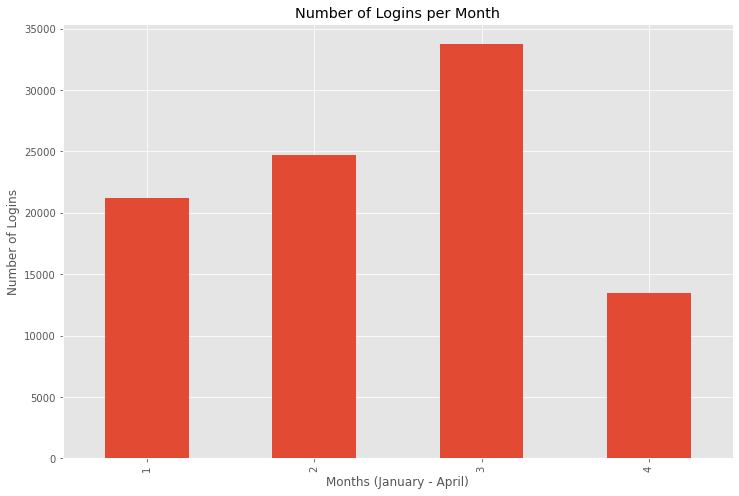

In [13]:
#cumulative plot of logins over months
logins['month'].value_counts().loc[[1, 2, 3, 4]].plot(kind="bar", figsize=(12, 8), title='Number of Logins per Month')
plt.xlabel('Months (January - April)')
plt.ylabel('Number of Logins')
plt.show

Below we can see that over the course of all months, the first half of the month has more logins than the second half of the month. We can also see relative low points every seven days.

<function matplotlib.pyplot.show(*args, **kw)>

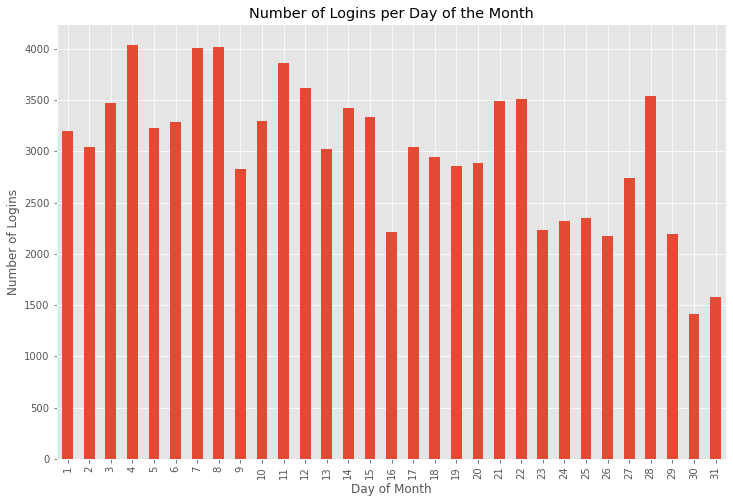

In [14]:
#cumulative plot of logins over days of the month
logins['day_of_month'].value_counts().loc[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                          11, 12, 13, 14, 15, 16, 17, 18, 
                                          19, 20, 21, 22, 23, 24, 25, 26, 
                                          27, 28, 29, 30, 31]].plot(kind="bar", figsize=(12, 8), 
                                                                    title='Number of Logins per Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Logins')
plt.show

Below we can see that over the course of a week, weekdays saw fewer logins than weekends.

<function matplotlib.pyplot.show(*args, **kw)>

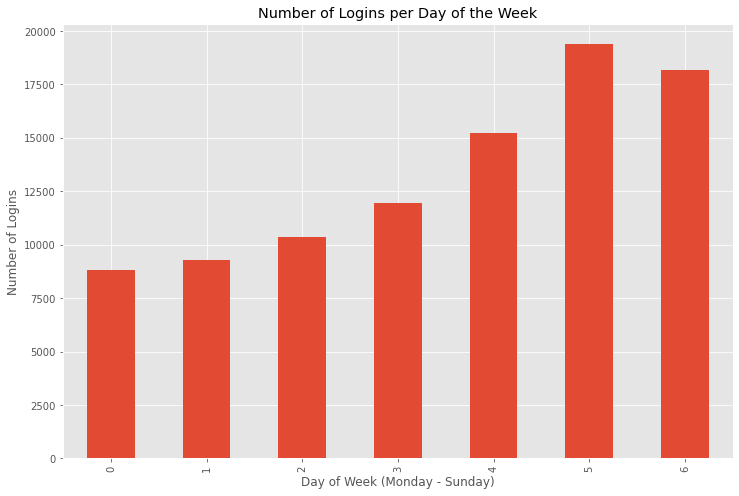

In [15]:
#cumulative plot of logins over days of the week

#0=Monday
logins['day_of_week'].value_counts().loc[[0, 1, 2, 3, 4, 5, 6]].plot(kind="bar", figsize=(12, 8), 
                                                                    title='Number of Logins per Day of the Week')
plt.xlabel('Day of Week (Monday - Sunday)')
plt.ylabel('Number of Logins')
plt.show

Below we can see that over the course of a day there fewer logins during rush hour times, and more frequent logins during the late hours of the night. This could suggest that people tend to login for a ride when they are engaging in recreational activity. Users do not commonly login to request a ride to and from work when they might drive their own cars, carpool, or have company transportation. However, users login at lunchtime, perhaps because they don't want to lose a parking spot at work when they leave the campus to eat, and they login at night, perhaps to go to dinner and nightlife venues where they may consume alcohol and not want to drive on their own.

<function matplotlib.pyplot.show(*args, **kw)>

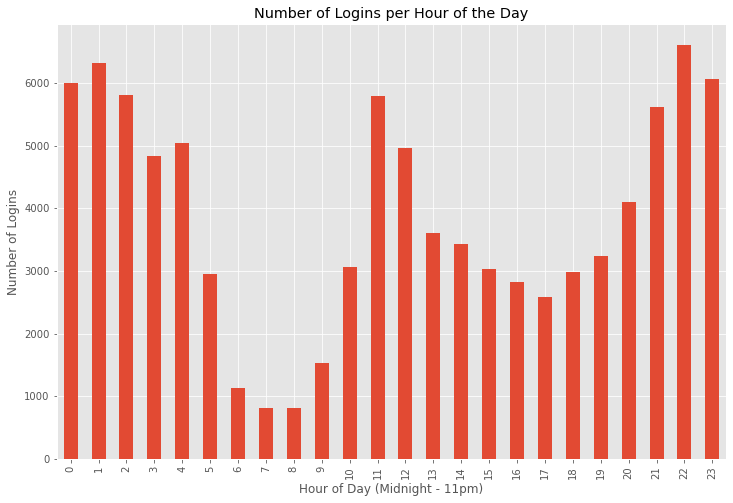

In [16]:
#cumulative plot of logins over hours of the day

logins['hour_of_day'].value_counts().loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                          11, 12, 13, 14, 15, 16, 17, 18, 
                                          19, 20, 21, 22, 23]].plot(kind="bar", figsize=(12, 8),
                                                                   title='Number of Logins per Hour of the Day')
plt.xlabel('Hour of Day (Midnight - 11pm)')
plt.ylabel('Number of Logins')
plt.show

# Experiment and Metrics Design

Problem:

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - how you will implement the experiment
    - what statistical test(s) you will conduct to verify the significance of the observation
    - how you would interpret the results and provide recommendations to the city operations team along with any caveats.

One possible solution:

1. The key metric to measure success in this experiment would be number of trips made by driver from one city to the other. This would be indicative of bridge crossings and thus connectedness between the two cities, rather than, for example, a driver who operates in one city during the day and the other at night.

2. An experiment I could run to test the effectiveness of the proposed change would be an A/B test. 
    - I would collect data from prior to the implementation of the incentive, as well as after implementation. Assuming I could get at least 10,000 samples for each period, I would take two weeks of prior data, and two weeks of subsequent data. That way both weekdays and weekends would be included. 
    - I would measure the number of intercity trips over the period. Because most drivers avoid intercity trips due to tolls, we can expect a non-normal distribution, with the data skewed towards zero and low numbers of trips. To normalize it, we can bootstrap samples and calculate a distribution of average number of intercity trips for each of the two periods. 
    - To test whether an improvement has occurred as a result of the incentive (i.e. the average number of intercity trips has increase sufficiently in the post-incentive data), we can calculate the results of a hypothesis test, such as one-sided Z-test, testing only for improvement, to see if the change is statistically significant. We can also perform a permutation test to compute the difference of means between the pre- and post-incentive data when compared to randomly achievable results.
    - If the resulting p-value is less than the alpha value (usually 0.05), then we can reject the null hypothesis that the difference is not significant. I would interpret the result to mean that the increase intercity rides was attributable to the incentive, and not ordinary or random variations in activity. I would recommend that the operations team continue to implement the incentive, as long as they continue to find it profitable. After all, the more intercity trips that occur, the more reimbursements they must pay.

# Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

## Step 1

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

### Data Cleaning

To the clean the data, I will first check for null values and decide how to handle them. For columns with only a few missing values, I can delete or fill them. Deletion is not an option when there are many nulls. For this problem, I decided to fill in all nulls. To fill in missing data from the rider rating column, I calculated the mean of the ratings and used this value to fill in the blanks. For missing phone type, I filled this will the majority value. The driver rating column had a significant number of null values. Rather than fill with a mean or a randomization of values already present in the column, I used linear regression to estimate and fill in the values.

In [19]:
#read the dataframe
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
#check length
print('Number of samples: ', len(df))
print()

#check for NaNs
print(df.isnull().sum())

#NaNs in three columns: avg_rating_by_driver, phone, avg_rating_of_driver

Number of samples:  50000

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [21]:
#examine phone data to see how to fill NaNs
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [22]:
# fill phone nans to iphone, since it is the majority by more than double
#alternatively fill to same ratio (approx. 2:1)
df["phone"].fillna("iPhone", inplace = True)
df.phone.value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [23]:
#examine rider rating data to see how to fill NaNs
df.avg_rating_by_driver.value_counts()

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

In [24]:
df.avg_rating_by_driver.mean()

4.77815819594771

In [25]:
#we can either set to majority (5.0) or set to average to avoid skewing the data
#I will set to average rounded to 1 decimal place
df["avg_rating_by_driver"].fillna(4.8, inplace = True)
df.avg_rating_by_driver.mean()

#mean is changed, but it is very slightly

4.778245999999999

In [26]:
#examine driver rating column to see how to fill NaNs

print(df.avg_rating_of_driver.value_counts())
print()
print('Mean: ', df.avg_rating_of_driver.mean())

5.0    20771
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.6        1
1.9        1
Name: avg_rating_of_driver, dtype: int64

Mean:  4.601559291274655


There are over 8000 NaNs (>16% of the data) in this column so deleting, or filling by majority, ratio, or mean will significantly affect the data. Instead we can try to use Logistic Regression to predict and impute the values of the missing data.

In [28]:

#change df to numeric for use in regression task

#categorical data to dummy variables
df_dummies = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)

#ensure columns are in datetime formate
df_dummies['signup_date'] = pd.to_datetime(df_dummies['signup_date'])
df_dummies['last_trip_date'] = pd.to_datetime(df_dummies['last_trip_date'])

#split datetimes
df_dummies['signup_year'] = df_dummies['signup_date'].dt.year
df_dummies['signup_month'] = df_dummies['signup_date'].dt.month
df_dummies['signup_day'] = df_dummies['signup_date'].dt.day
df_dummies['signup_dayofweek'] = df_dummies['signup_date'].dt.dayofweek

df_dummies['lasttrip_year'] = df_dummies['last_trip_date'].dt.year
df_dummies['lasttrip_month'] = df_dummies['last_trip_date'].dt.month
df_dummies['lasttrip_day'] = df_dummies['last_trip_date'].dt.day
df_dummies['lasttrip_dayofweek'] = df_dummies['last_trip_date'].dt.dayofweek

df_numeric = df_dummies.drop(['signup_date', 'last_trip_date'], 1)

#df_numeric.head()
print(df_numeric.isnull().sum())

trips_in_first_30_days         0
avg_rating_of_driver        8122
avg_surge                      0
surge_pct                      0
weekday_pct                    0
avg_dist                       0
avg_rating_by_driver           0
city_King's Landing            0
city_Winterfell                0
phone_iPhone                   0
ultimate_black_user_True       0
signup_year                    0
signup_month                   0
signup_day                     0
signup_dayofweek               0
lasttrip_year                  0
lasttrip_month                 0
lasttrip_day                   0
lasttrip_dayofweek             0
dtype: int64


In [29]:
#split training and testing data

#training
df_no_null = df_numeric.dropna()
#testing
df_nulls = df_numeric[pd.isnull(df_numeric).any(axis=1)]


In [30]:
#set training and testing X data to everything minus the avg_rating_of_driver; set training y to the present 
#avg_rating_of_driver. Test y is the null values from this column that will be predicted.

X_train = df_no_null.drop('avg_rating_of_driver', 1)
y_train = df_no_null['avg_rating_of_driver']
X_test = df_nulls.drop('avg_rating_of_driver', 1)

In [31]:
print(len(X_train))
print(len(y_train))
print(len(X_test))


41878
41878
8122


In [32]:

#instantiate linear regression
linreg = LinearRegression()
#fit data
linreg.fit(X_train, y_train)
#predict ratings
preds = np.round_(linreg.predict(X_test), decimals=1)


len(preds)

8122

In [33]:
print(preds[:10])

[4.5 4.6 4.6 4.8 4.6 4.3 4.7 4.6 4.6 4.6]


In [34]:
#add new values to the df

# ratings = pd.Series(preds)
# df_numeric['avg_rating_of_driver'].fillna(ratings)
df_numeric.loc[df_numeric['avg_rating_of_driver'].isnull(), 'avg_rating_of_driver'] = preds
print('Number of nulls: ', df_numeric['avg_rating_of_driver'].isnull().sum())
print('Mean: ', df_numeric['avg_rating_of_driver'].mean())

#very little change to mean

Number of nulls:  0
Mean:  4.603096


In [35]:
print(df_numeric.isnull().sum())

trips_in_first_30_days      0
avg_rating_of_driver        0
avg_surge                   0
surge_pct                   0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
city_King's Landing         0
city_Winterfell             0
phone_iPhone                0
ultimate_black_user_True    0
signup_year                 0
signup_month                0
signup_day                  0
signup_dayofweek            0
lasttrip_year               0
lasttrip_month              0
lasttrip_day                0
lasttrip_dayofweek          0
dtype: int64


In [36]:
df_numeric.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,signup_year,signup_month,signup_day,signup_dayofweek,lasttrip_year,lasttrip_month,lasttrip_day,lasttrip_dayofweek
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1,2014,1,25,5,2014,6,17,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,2014,1,29,2,2014,5,5,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0,2014,1,6,0,2014,1,7,1
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1,2014,1,10,4,2014,6,29,6
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0,2014,1,27,0,2014,3,15,5


### Add retained column

For exploratory purposes now, and for machine learning later, we need a column to show whether a customer has been retained or not. We don't know the exact date we are supposed to have obtained this dataset, so we will use the most recent date from the last trip column to infer the date. All users who took trips within 30 days prior to the most recent date available will be counted as retained.

In [37]:
# add target feature of retained customers

#find most recent date in last trips

df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

print(df['last_trip_date'].max())

2014-07-01 00:00:00


In [38]:
df_numeric['lasttrip_month'].value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: lasttrip_month, dtype: int64

It looks like the last recorded trip and dataset cut off point is July 1, 2014, at midnight. In this case we do not need to calculate the timedelta, since it is clear that anyone who rode in the month of June has ridden in the past 30 days. We can just use the lasttrip_month column created from splitting the dates to assign this.

In [39]:

#assign 1 for values month>=6, 0 for month<6, add to numeric dataframe
#include month=7 since the cutoff point is midnight and these people were likely in the middle of a trip

df_numeric['retained'] = [1 if x >= 6 else 0 for x in df_numeric['lasttrip_month']]

df_numeric.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True,signup_year,signup_month,signup_day,signup_dayofweek,lasttrip_year,lasttrip_month,lasttrip_day,lasttrip_dayofweek,retained
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1,2014,1,25,5,2014,6,17,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0,2014,1,29,2,2014,5,5,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0,2014,1,6,0,2014,1,7,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1,2014,1,10,4,2014,6,29,6,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0,2014,1,27,0,2014,3,15,5,0


In [40]:
#calculate percent of retained users

print('Number of retained users: ', df_numeric['retained'].sum())
print('Percent of retained users: ', df_numeric['retained'].sum()/len(df_numeric)*100)


Number of retained users:  18804
Percent of retained users:  37.608000000000004


In [41]:
#also add this to the dataframe with categorical data
df['retained'] = df_numeric['retained']
#df.head()

equiv = {1:'Retained', 0:'Not Retained'}
df['retained_string'] = df['retained'].map(equiv)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,retained_string
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,Retained
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,Not Retained
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,Not Retained
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,Retained
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,Not Retained


## Plots of Categorical Data

In the next stage of exploration I will plot every column systematically to visualize distributions. Categorical data is visualized with frequency distributions, and numeric data is visualized with histograms and boxplots. Each plot is also split into a comparative distribution plot for retained and unretained riders.

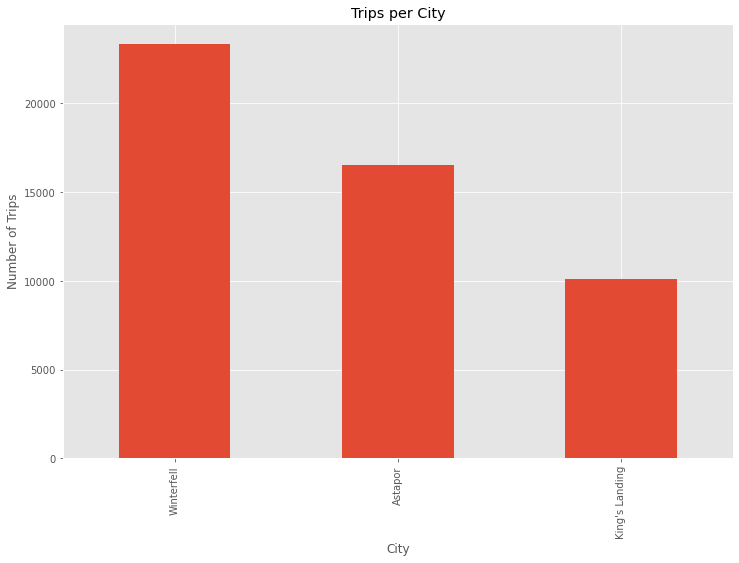

In [43]:
# plot of trips per city
df['city'].value_counts().plot(kind='bar', figsize=(12,8), title='Trips per City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.show()

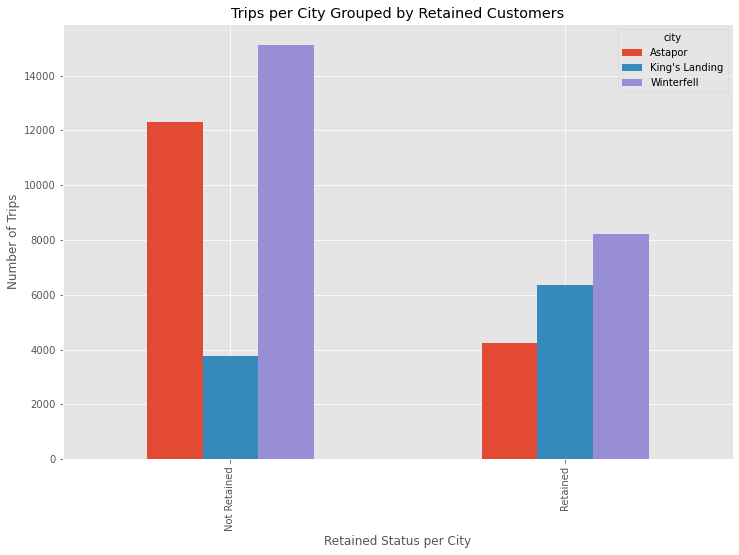

In [44]:
df.groupby('retained_string')['city'].value_counts().unstack().plot(kind='bar', figsize=(12,8), 
                                                                    title='Trips per City Grouped by Retained Customers')
plt.xlabel('Retained Status per City')
plt.ylabel('Number of Trips')
plt.show()

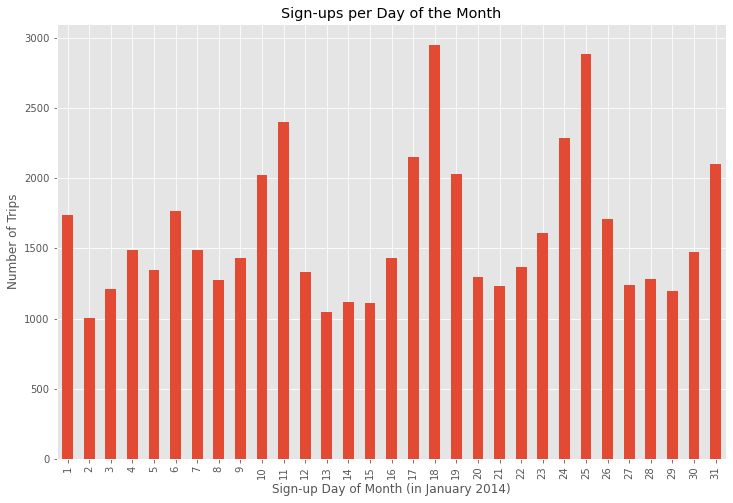

In [45]:
df_numeric['signup_day'].value_counts().loc[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                            11, 12, 13, 14, 15, 16, 17, 18, 
                                            19, 20, 21, 22, 23, 24, 25, 26,
                                            27, 28, 29, 30]].plot(kind='bar', figsize=(12,8), 
                                                                     title='Sign-ups per Day of the Month')

plt.xlabel('Sign-up Day of Month (in January 2014)')
plt.ylabel('Number of Trips')
plt.show()

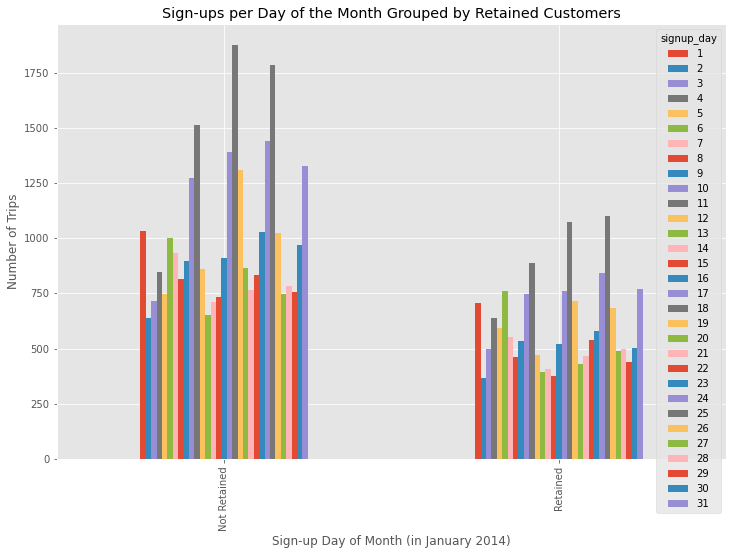

In [46]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['signup_day'] = df['signup_date'].dt.day
df['signup_dayofweek'] = df['signup_date'].dt.dayofweek

df.groupby('retained_string')['signup_day'].value_counts().unstack().plot(kind='bar', figsize=(12,8), 
                                                                          title='Sign-ups per Day of the Month Grouped by Retained Customers')

plt.xlabel('Sign-up Day of Month (in January 2014)')
plt.ylabel('Number of Trips')
plt.show()

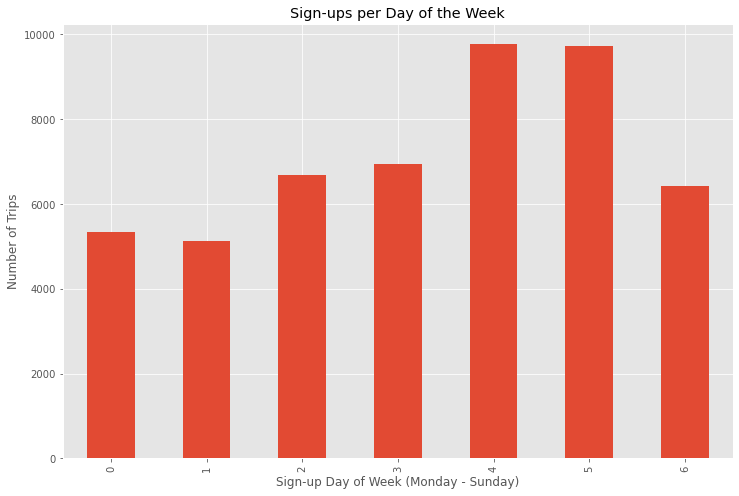

In [47]:
df_numeric['signup_dayofweek'].value_counts().loc[[0, 1, 2, 3, 4, 5, 6]].plot(kind='bar', figsize=(12,8), 
                                                                     title='Sign-up Day of the Week')

plt.xlabel('Sign-up Day of Week (Monday - Sunday)')
plt.ylabel('Number of Trips')
plt.show()

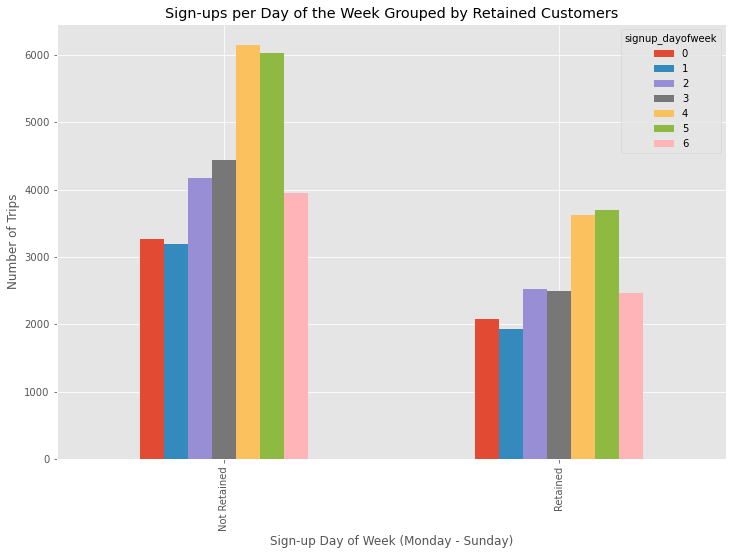

In [48]:
df.groupby('retained_string')['signup_dayofweek'].value_counts().unstack().plot(kind='bar', figsize=(12,8), 
                                                                          title='Sign-up Day of the Week Grouped by Retained Customers')

plt.xlabel('Sign-up Day of Week (Monday - Sunday)')
plt.ylabel('Number of Trips')
plt.show()


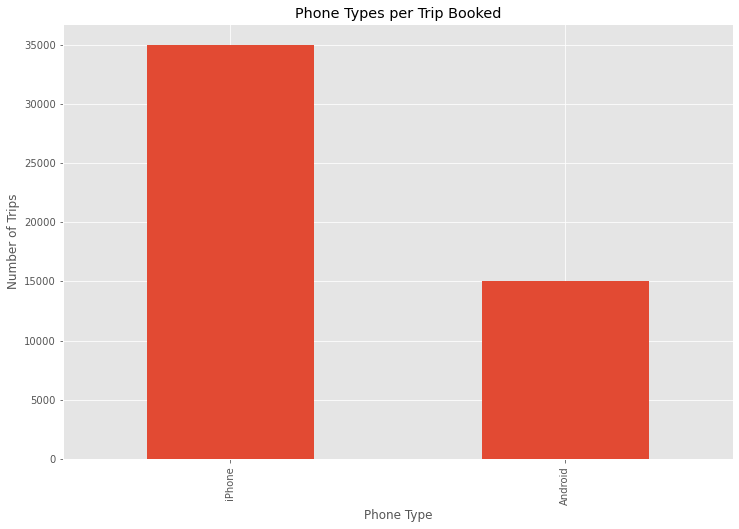

In [49]:
df['phone'].value_counts().plot(kind='bar', figsize=(12,8), title='Phone Types per Trip Booked')
plt.xlabel('Phone Type')
plt.ylabel('Number of Trips')
plt.show()

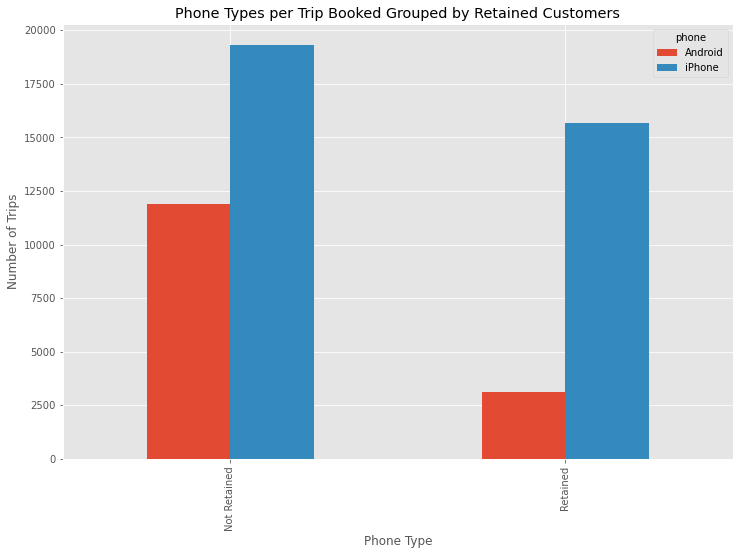

In [50]:
df.groupby('retained_string')['phone'].value_counts().unstack().plot(kind='bar', figsize=(12,8), 
                                                                     title='Phone Types per Trip Booked Grouped by Retained Customers')
plt.xlabel('Phone Type')
plt.ylabel('Number of Trips')
plt.show()

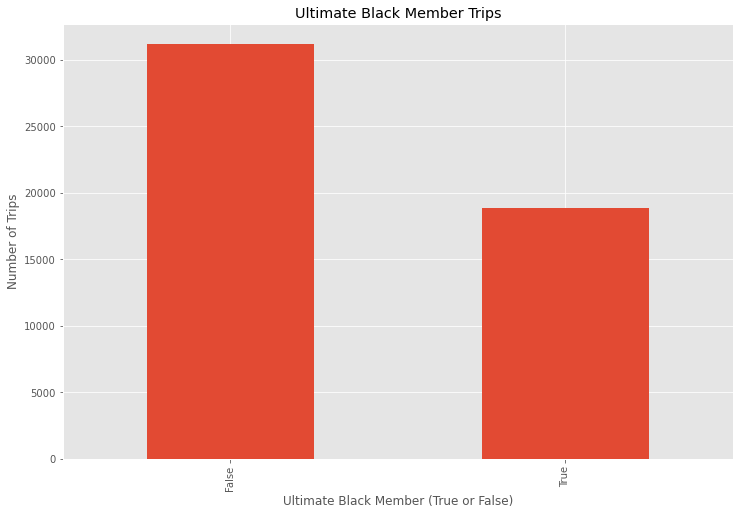

In [51]:
df['ultimate_black_user'].value_counts().plot(kind='bar', figsize=(12,8), title='Ultimate Black Member Trips')
plt.xlabel('Ultimate Black Member (True or False)')
plt.ylabel('Number of Trips')
plt.show()

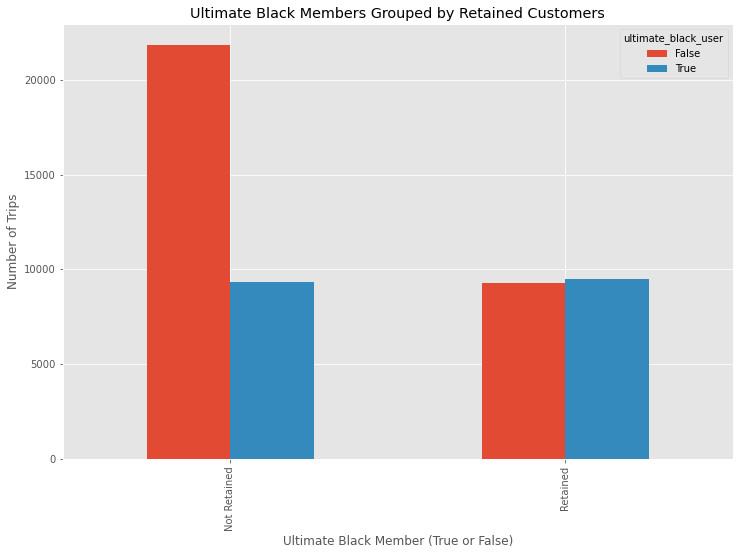

In [52]:
df.groupby('retained_string')['ultimate_black_user'].value_counts().unstack().plot(kind='bar', figsize=(12,8),
                                                                                  title='Ultimate Black Members Grouped by Retained Customers')
plt.xlabel('Ultimate Black Member (True or False)')
plt.ylabel('Number of Trips')
plt.show()

## Plots of Numerical Data

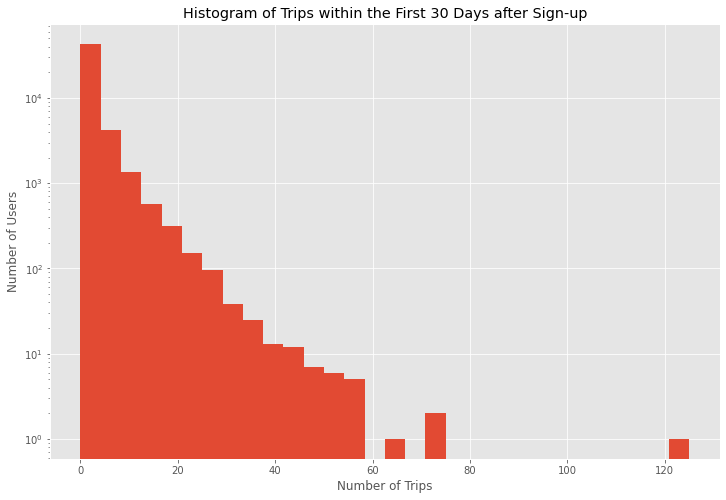

In [53]:
df['trips_in_first_30_days'].hist(bins=30, figsize=(12,8))
plt.yscale('log')
plt.title('Histogram of Trips within the First 30 Days after Sign-up')
plt.xlabel('Number of Trips')
plt.ylabel('Number of Users')
plt.show()

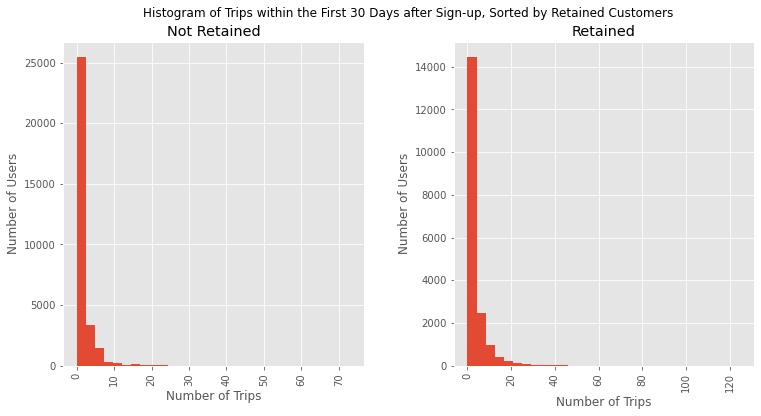

In [54]:

axes = df['trips_in_first_30_days'].hist(by=df['retained_string'], bins=30, figsize=(12,6))
plt.suptitle('Histogram of Trips within the First 30 Days after Sign-up, Sorted by Retained Customers')
#plt.yscale('log')
for ax in axes.flatten():
    ax.set_xlabel("Number of Trips")
    ax.set_ylabel("Number of Users")
plt.show()

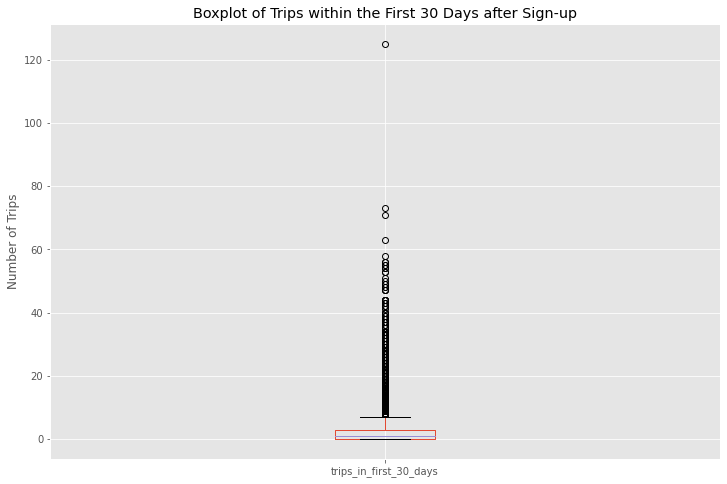

In [55]:

df.boxplot(column='trips_in_first_30_days', figsize=(12,8))
#.set_yscale('log')
plt.title('Boxplot of Trips within the First 30 Days after Sign-up')
#plt.xlabel('Number of Trips')
plt.ylabel('Number of Trips')
plt.show()

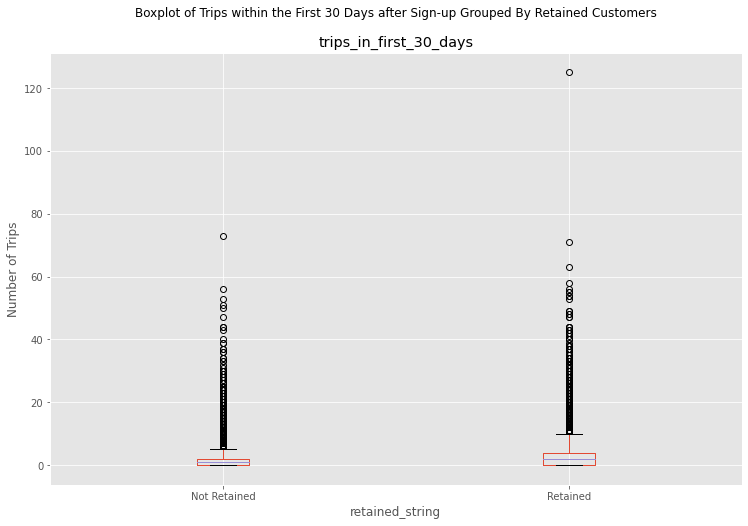

In [56]:
df.boxplot(column='trips_in_first_30_days', by='retained_string', figsize=(12,8))
#.set_yscale('log')
plt.suptitle("Boxplot of Trips within the First 30 Days after Sign-up Grouped By Retained Customers")
plt.ylabel('Number of Trips')
plt.show()

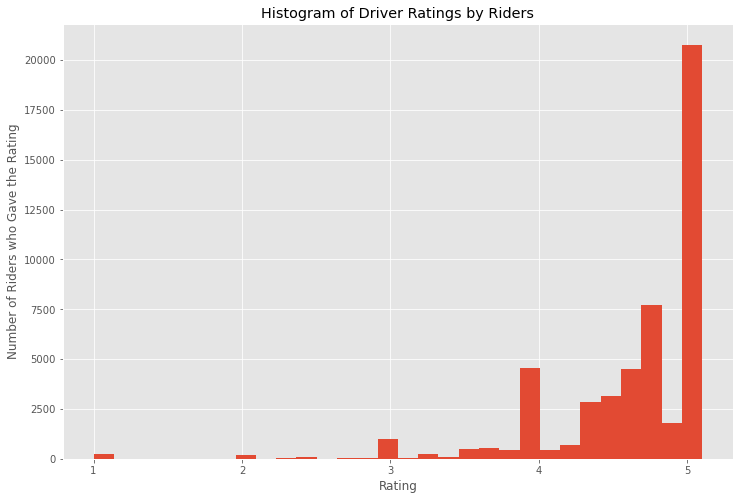

In [57]:

df_numeric['avg_rating_of_driver'].hist(bins=30, figsize=(12,8))
plt.title('Histogram of Driver Ratings by Riders')
plt.xlabel('Rating')
plt.ylabel('Number of Riders who Gave the Rating')
plt.show()

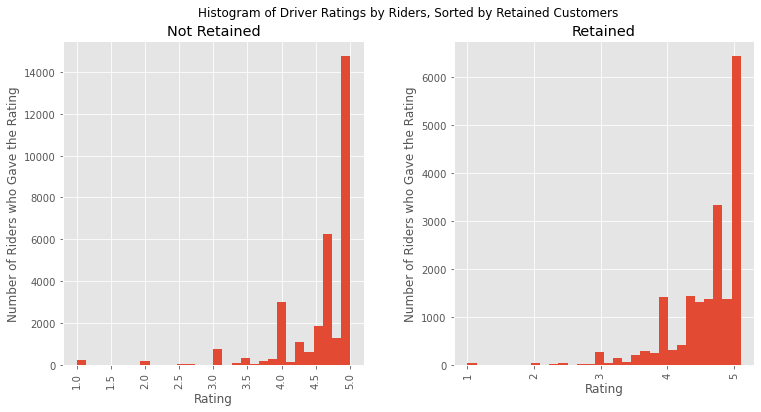

In [58]:
df_numeric['retained_string'] = df['retained_string']
axes = df_numeric['avg_rating_of_driver'].hist(by=df_numeric['retained_string'], bins=30, figsize=(12,6))
plt.suptitle('Histogram of Driver Ratings by Riders, Sorted by Retained Customers')
#plt.yscale('log')
for ax in axes.flatten():
    ax.set_xlabel("Rating")
    ax.set_ylabel("Number of Riders who Gave the Rating")
plt.show()

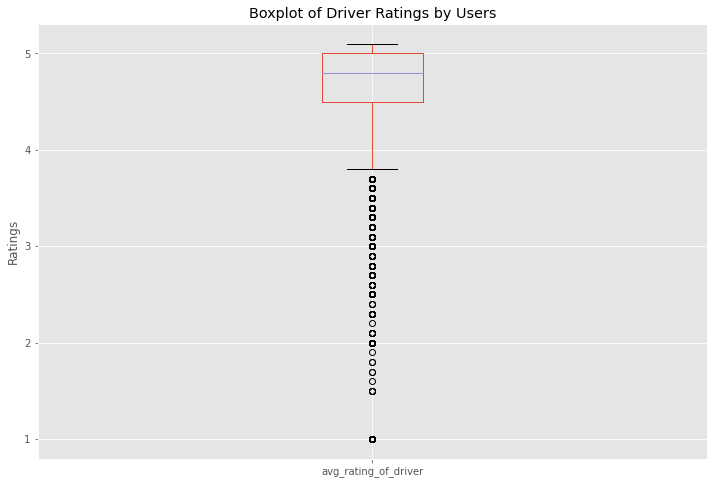

In [59]:

df_numeric.boxplot(column='avg_rating_of_driver', figsize=(12,8))
#.set_yscale('log')
plt.title('Boxplot of Driver Ratings by Users')
#plt.xlabel('Number of Trips')
plt.ylabel('Ratings')
plt.show()

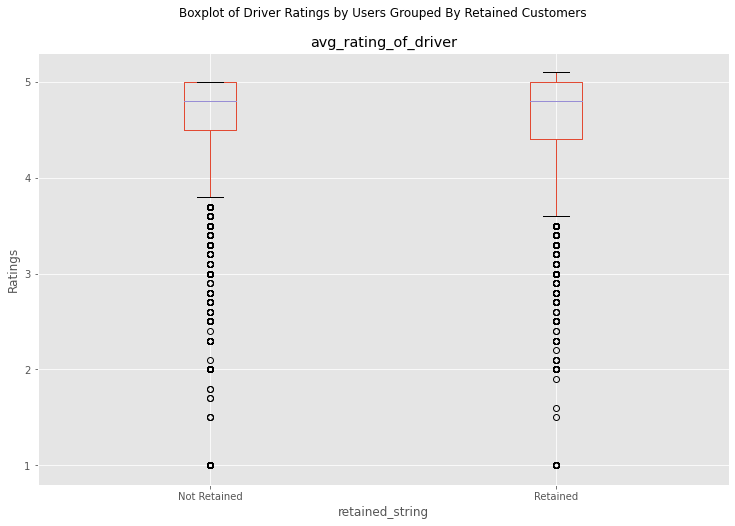

In [60]:
df_numeric.boxplot(column='avg_rating_of_driver', by='retained_string', figsize=(12,8))
#.set_yscale('log')
plt.suptitle("Boxplot of Driver Ratings by Users Grouped By Retained Customers")
plt.ylabel('Ratings')
plt.show()

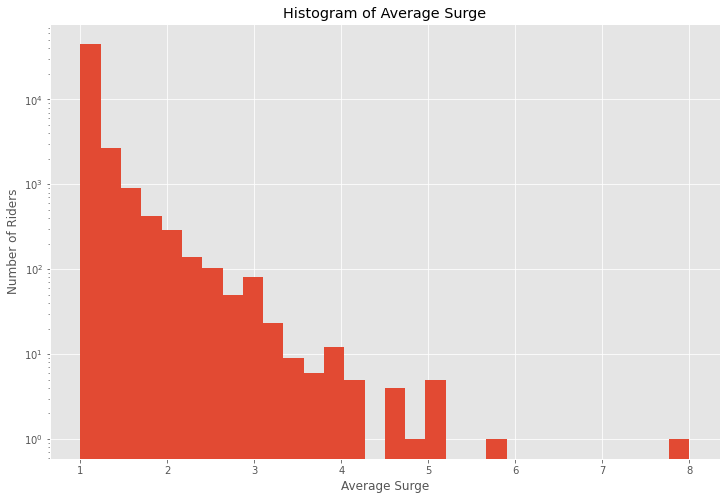

In [61]:

df['avg_surge'].hist(bins=30, figsize=(12,8))
plt.yscale('log')
plt.title('Histogram of Average Surge')
plt.xlabel('Average Surge')
plt.ylabel('Number of Riders')
plt.show()

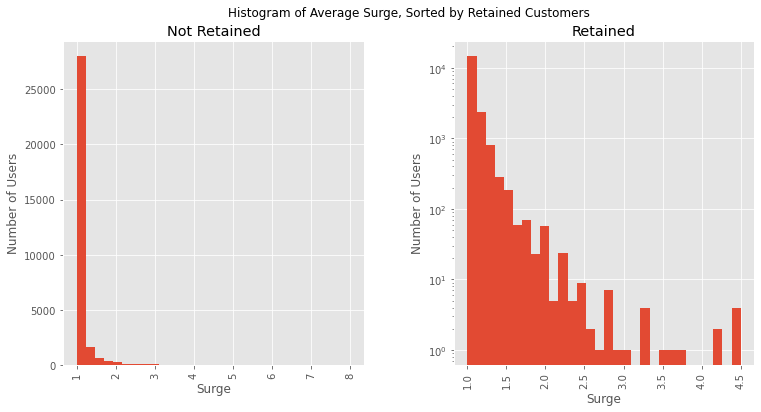

In [62]:
axes = df['avg_surge'].hist(by=df['retained_string'], bins=30, figsize=(12,6))
plt.yscale('log')
plt.suptitle('Histogram of Average Surge, Sorted by Retained Customers')
#plt.yscale('log')
for ax in axes.flatten():
    ax.set_xlabel("Surge")
    ax.set_ylabel("Number of Users")
plt.show()

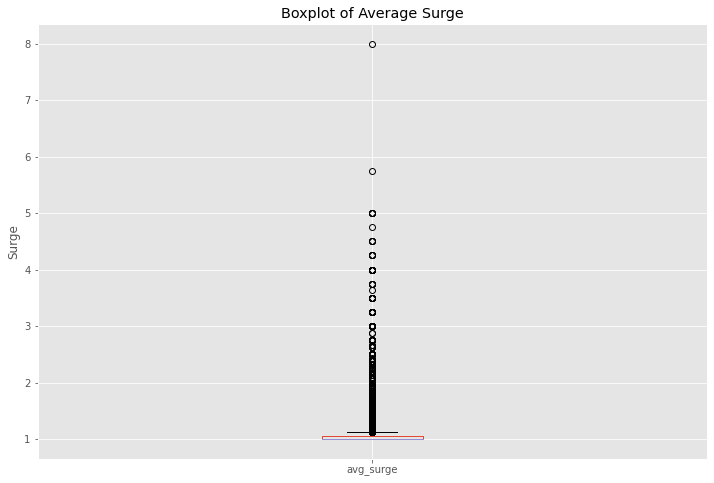

In [63]:

df.boxplot(column='avg_surge', figsize=(12,8))
#.set_yscale('log')
plt.title('Boxplot of Average Surge')
#plt.xlabel('Number of Trips')
plt.ylabel('Surge')
plt.show()

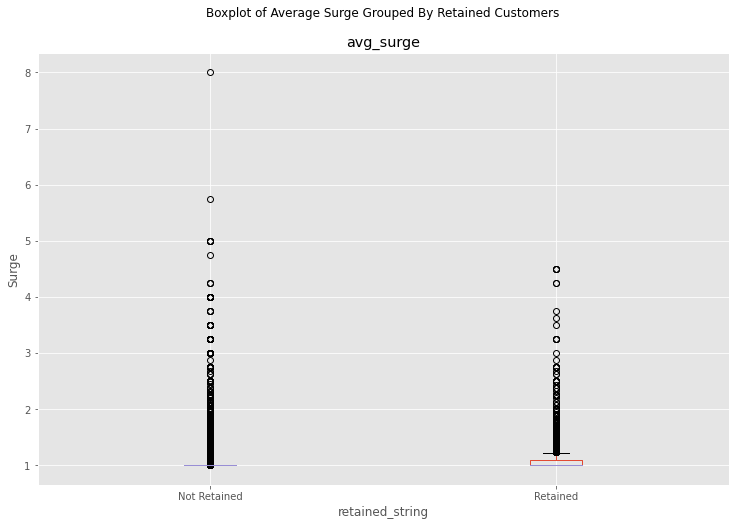

In [64]:
df.boxplot(column='avg_surge', by='retained_string', figsize=(12,8))
#.set_yscale('log')
plt.suptitle("Boxplot of Average Surge Grouped By Retained Customers")
plt.ylabel('Surge')
plt.show()

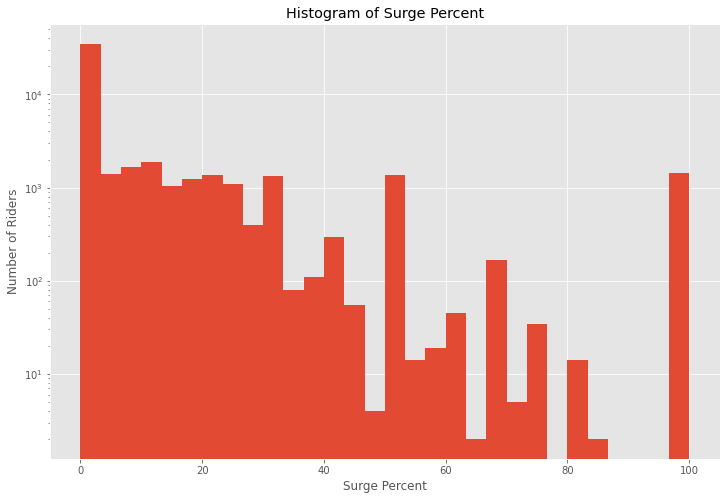

In [65]:

df['surge_pct'].hist(bins=30, figsize=(12,8))
plt.yscale('log')
plt.title('Histogram of Surge Percent')
plt.xlabel('Surge Percent')
plt.ylabel('Number of Riders')
plt.show()

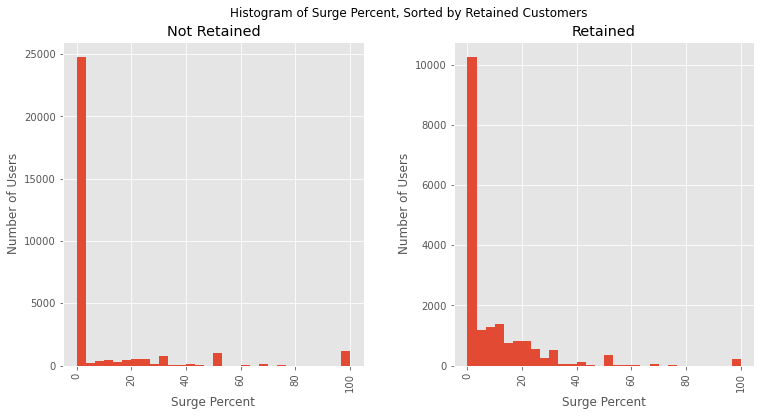

In [66]:
axes = df['surge_pct'].hist(by=df['retained_string'], bins=30, figsize=(12,6))
#plt.yscale('log')
plt.suptitle('Histogram of Surge Percent, Sorted by Retained Customers')
#plt.yscale('log')
for ax in axes.flatten():
    ax.set_xlabel("Surge Percent")
    ax.set_ylabel("Number of Users")
plt.show()

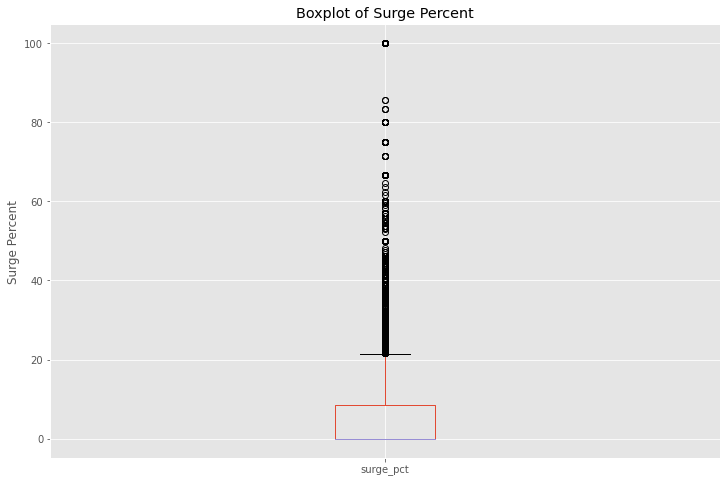

In [67]:
df.boxplot(column='surge_pct', figsize=(12,8))
#.set_yscale('log')
plt.title('Boxplot of Surge Percent')
#plt.xlabel('Number of Trips')
plt.ylabel('Surge Percent')
plt.show()

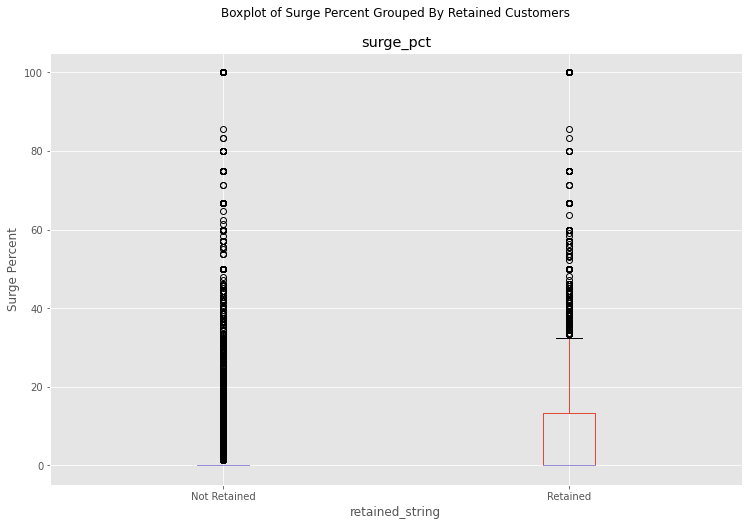

In [68]:
df.boxplot(column='surge_pct', by='retained_string', figsize=(12,8))
#.set_yscale('log')
plt.suptitle("Boxplot of Surge Percent Grouped By Retained Customers")
plt.ylabel('Surge Percent')
plt.show()

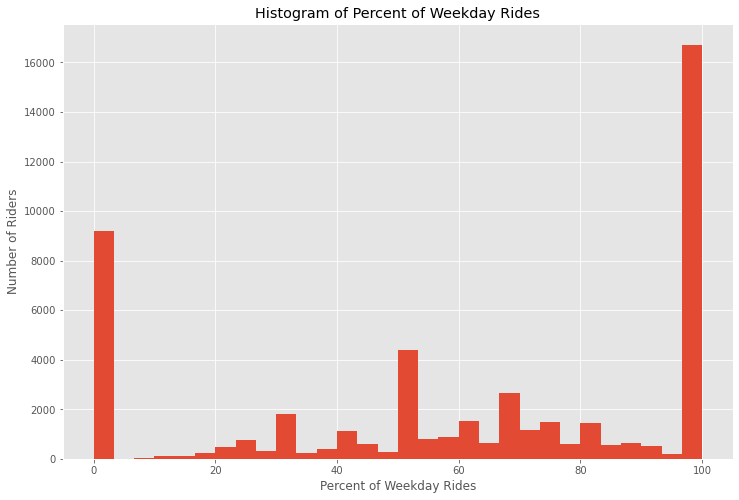

In [69]:

df['weekday_pct'].hist(bins=30, figsize=(12,8))
#plt.yscale('log')
plt.title('Histogram of Percent of Weekday Rides')
plt.xlabel('Percent of Weekday Rides')
plt.ylabel('Number of Riders')
plt.show()

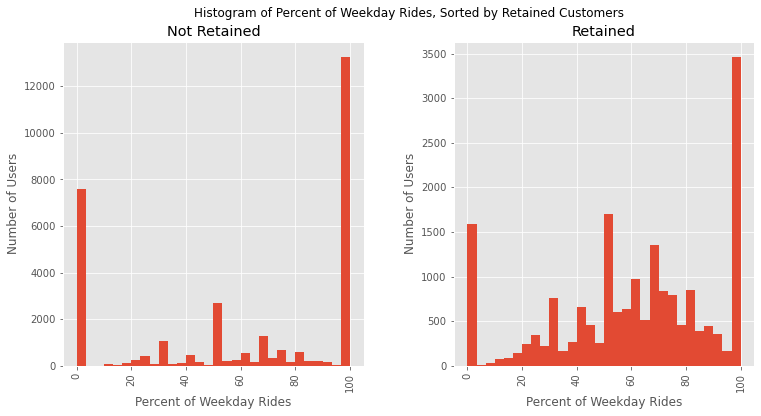

In [70]:
axes = df['weekday_pct'].hist(by=df['retained_string'], bins=30, figsize=(12,6))
#plt.yscale('log')
plt.suptitle('Histogram of Percent of Weekday Rides, Sorted by Retained Customers')
for ax in axes.flatten():
    ax.set_xlabel("Percent of Weekday Rides")
    ax.set_ylabel("Number of Users")
plt.show()

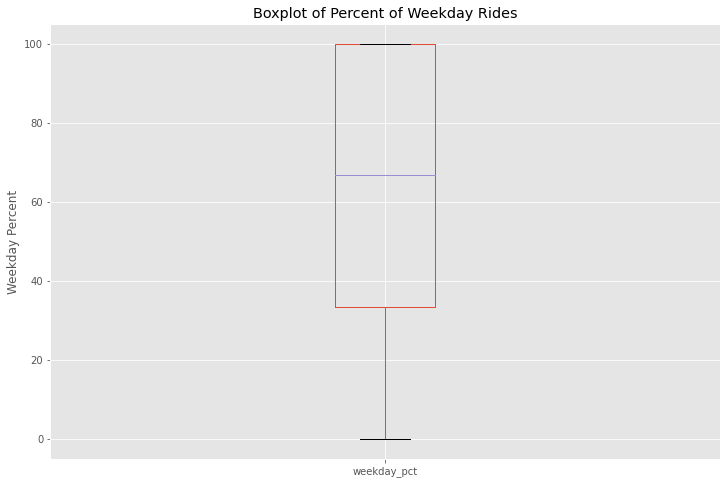

In [71]:

df.boxplot(column='weekday_pct', figsize=(12,8))
#.set_yscale('log')
plt.title('Boxplot of Percent of Weekday Rides')
#plt.xlabel('Number of Trips')
plt.ylabel('Weekday Percent')
plt.show()

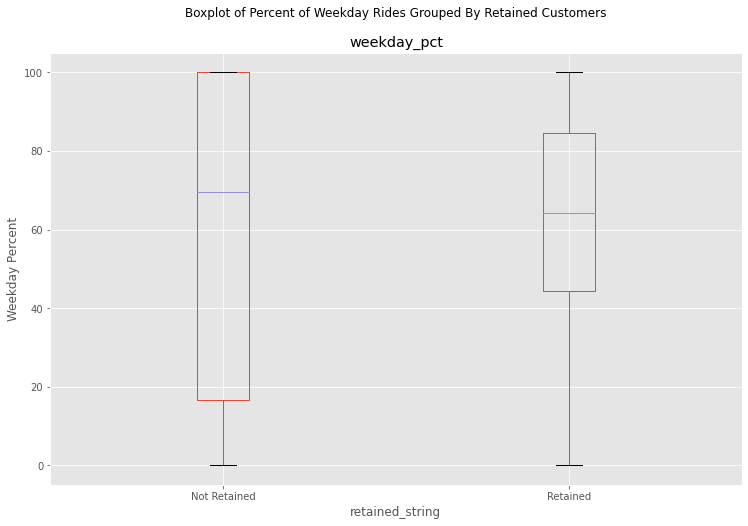

In [72]:
df.boxplot(column='weekday_pct', by='retained_string', figsize=(12,8))
#.set_yscale('log')
plt.suptitle("Boxplot of Percent of Weekday Rides Grouped By Retained Customers")
plt.ylabel('Weekday Percent')
plt.show()

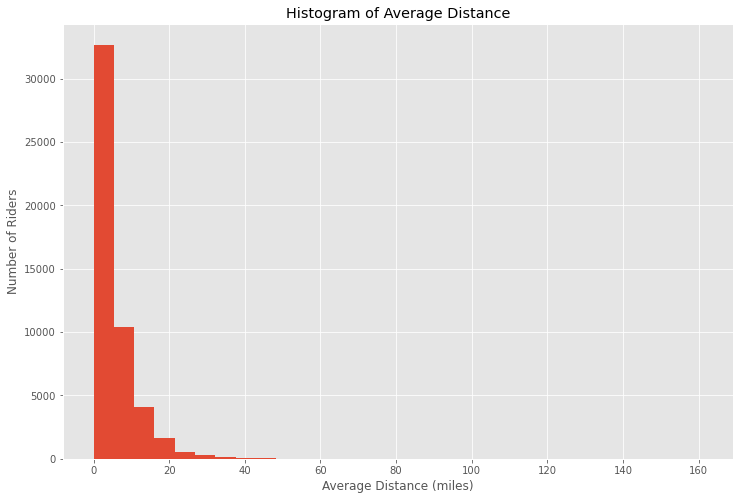

In [73]:

df['avg_dist'].hist(bins=30, figsize=(12,8))
#plt.yscale('log')
plt.title('Histogram of Average Distance')
plt.xlabel('Average Distance (miles)')
plt.ylabel('Number of Riders')
plt.show()



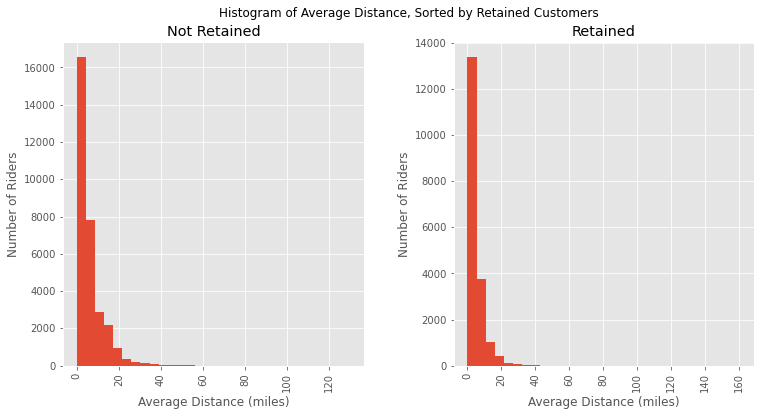

In [74]:
axes = df['avg_dist'].hist(by=df['retained_string'], bins=30, figsize=(12,6))
#plt.yscale('log')
plt.suptitle('Histogram of Average Distance, Sorted by Retained Customers')
for ax in axes.flatten():
    ax.set_xlabel("Average Distance (miles)")
    ax.set_ylabel("Number of Riders")
plt.show()

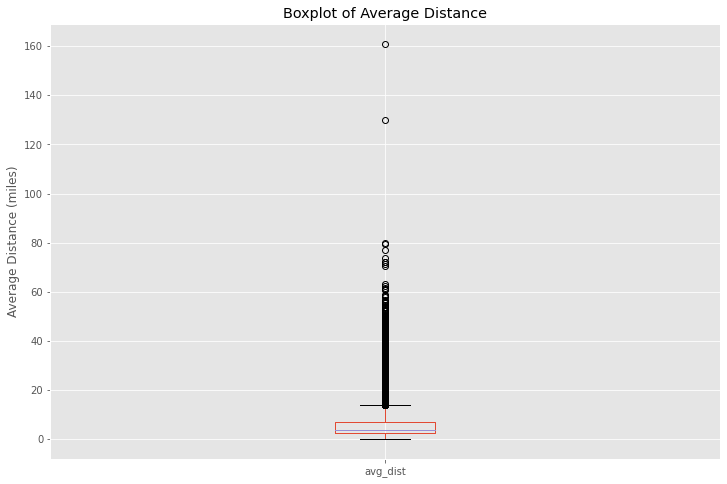

In [75]:

df.boxplot(column='avg_dist', figsize=(12,8))
#.set_yscale('log')
plt.title('Boxplot of Average Distance')
#plt.xlabel('Number of Trips')
plt.ylabel('Average Distance (miles)')
plt.show()

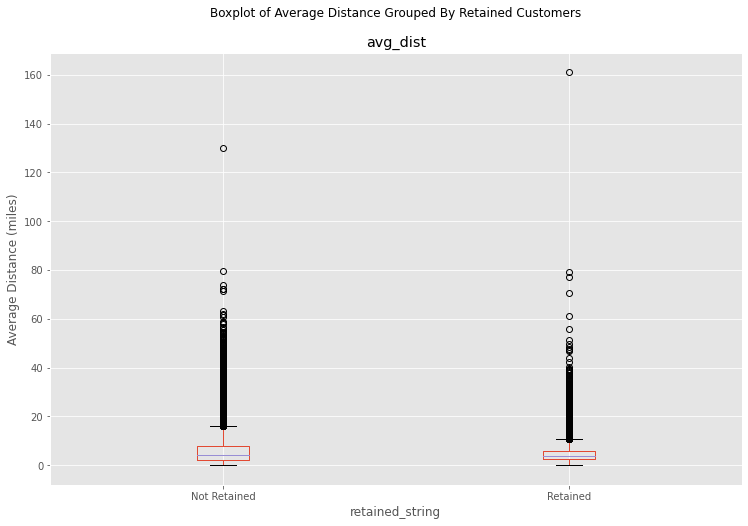

In [76]:
df.boxplot(column='avg_dist', by='retained_string', figsize=(12,8))
#.set_yscale('log')
plt.suptitle("Boxplot of Average Distance Grouped By Retained Customers")
plt.ylabel('Average Distance (miles)')
plt.show()

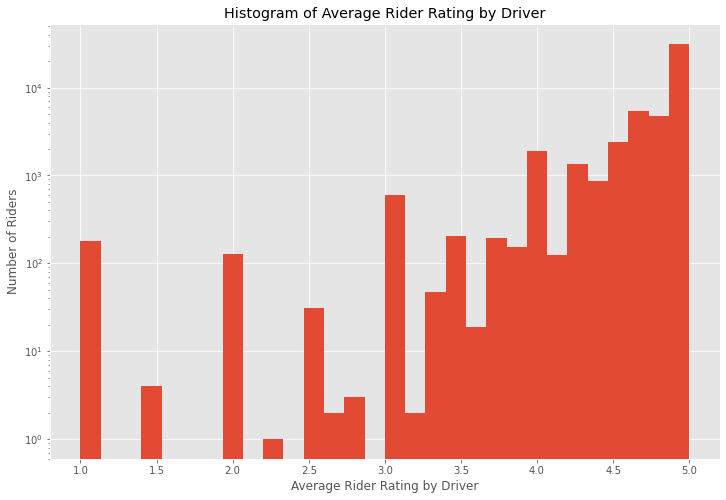

In [77]:

df['avg_rating_by_driver'].hist(bins=30, figsize=(12,8))
plt.yscale('log')
plt.title('Histogram of Average Rider Rating by Driver')
plt.xlabel('Average Rider Rating by Driver')
plt.ylabel('Number of Riders')
plt.show()


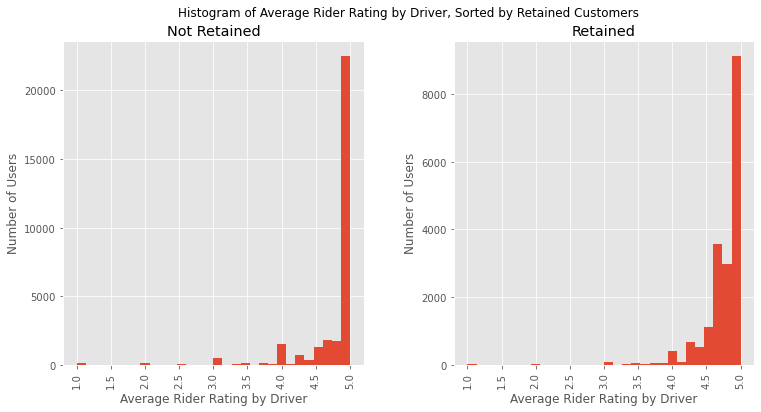

In [78]:
axes = df['avg_rating_by_driver'].hist(by=df['retained_string'], bins=30, figsize=(12,6))
#plt.yscale('log')
plt.suptitle('Histogram of Average Rider Rating by Driver, Sorted by Retained Customers')
for ax in axes.flatten():
    ax.set_xlabel("Average Rider Rating by Driver")
    ax.set_ylabel("Number of Users")
plt.show()

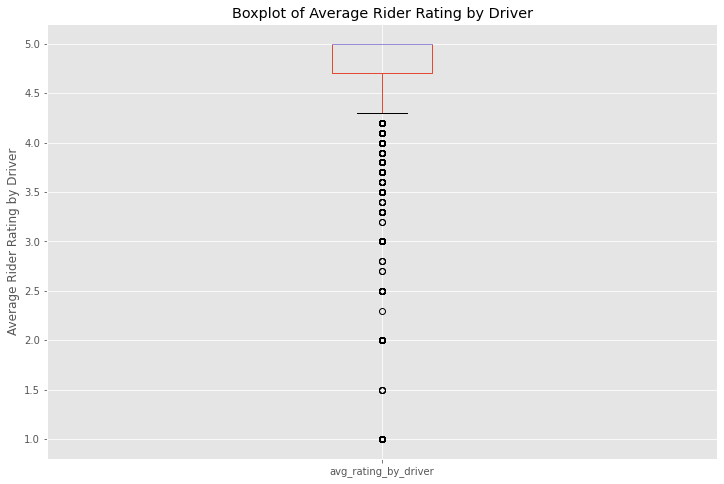

In [79]:

df.boxplot(column='avg_rating_by_driver', figsize=(12,8))
#.set_yscale('log')
plt.title('Boxplot of Average Rider Rating by Driver')
#plt.xlabel('Number of Trips')
plt.ylabel('Average Rider Rating by Driver')
plt.show()

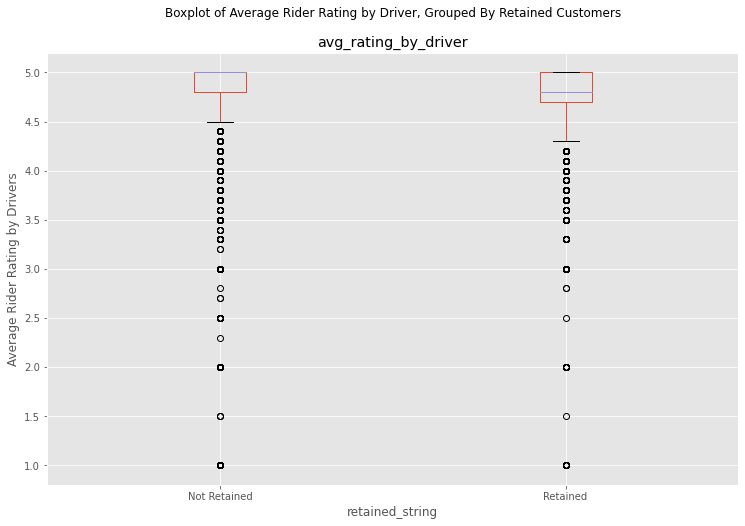

In [80]:
df.boxplot(column='avg_rating_by_driver', by='retained_string', figsize=(12,8))
#.set_yscale('log')
plt.suptitle("Boxplot of Average Rider Rating by Driver, Grouped By Retained Customers")
plt.ylabel('Average Rider Rating by Drivers')
plt.show()

## Predictive Modeling

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

I have used three different models to predict whether a rider will be retained or not: Decision Tree, Random Forest, and K Nearest Neighbors. I chose these because they do no have underlying assumptions about the distribution of data. So far, the models achieve similar accuracy scores on the test data, but all models predicted more false positives than false negatives. Each model relied on different important features for splitting decisions and grouping as well.

In [81]:
#set up

#statistical analysis
import scipy.stats
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import t
from scipy.stats import boxcox
import statsmodels.api as sm

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

print('done')

done


I have split the data into training and testing sets, with the target value being whether or not a customer was retained. In addition, I have dropped all last ride date data from the X data, because this information would not be known about any new users we might want to have insight about, and the month from the last ride correlates exactly with whether the customer was retained.

In [82]:
#train/test split

#get rid of categorical column added earlier for grouping
df_numeric = df_numeric.drop(['retained_string'], 1)

#split into training and target
X = df_numeric.drop(['retained'], axis=1)
y = df_numeric['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#split into training and target with no last ride data included
X_nolastride = df_numeric.drop(['retained', 'lasttrip_dayofweek', 'lasttrip_day', 'lasttrip_month', 'lasttrip_year'], axis=1)
y_nlr = df_numeric['retained']

X_train_nlr, X_test_nlr, y_train_nlr, y_test_nlr = train_test_split(X_nolastride, y_nlr, test_size=0.2, random_state=0)


The first model is Decision Tree. I perform a grid search to find optimal hyperparameters, then make predictions with the tuned model. The metrics included are accuracy, confusion matrix, Area Under ROC curve, and classification report, which includes precision, recall, and F1 scores for each class. Below that, I have graphed feature importances to see which features impacted Tree decisions the most. I also followed this process for the Random Forest and KNN models.

In [86]:
#try decision tree because data does not have normal distributions

#functions for hyperparameter tuning

def performance_metric_accuracy(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model(X, y):
 
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    #  Create a logistic regression object
    regressor = DecisionTreeClassifier()

    #  Create a dictionary for the parameters 
    params = {'max_features': [None, 'sqrt'], 'min_samples_split': [6, 8, 9, 10, 11, 12], 'max_depth': [4, 5, 6, 7, 8, 9, 10], 
              'splitter': ['best', 'random']}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [87]:
#find optimal hyperparameters

result_nolastride = fit_model(X_train_nlr, y_train_nlr)
print(result_nolastride)

DecisionTreeClassifier(max_depth=7, min_samples_split=12)


In [89]:
#predict with decision tree

#instantiate the classifier
decTree2 = DecisionTreeClassifier(max_depth=7, min_samples_split=12)

# Fit the model on the training data.
decTree2.fit(X_train_nlr, y_train_nlr)

y_pred_nlr = decTree2.predict(X_test_nlr)

# accuracy score for training
train_accuracy = decTree2.score(X_train_nlr, y_train_nlr)

# accuracy score for test set
test_accuracy = decTree2.score(X_test_nlr, y_test_nlr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_nlr, y_pred_nlr)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))
print('ROC AUC is {}'.format(roc_auc))
print(confusion_matrix(y_test_nlr, y_pred_nlr))
print(classification_report(y_test_nlr, y_pred_nlr))

Training set score is 0.776825
Test set score is 0.7709
ROC AUC is 0.7426555256093674
[[5348  903]
 [1388 2361]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      6251
           1       0.72      0.63      0.67      3749

    accuracy                           0.77     10000
   macro avg       0.76      0.74      0.75     10000
weighted avg       0.77      0.77      0.77     10000



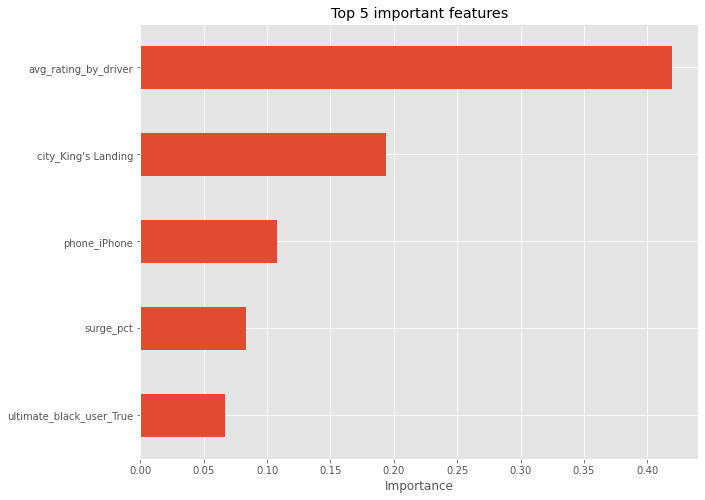

In [90]:
#plot feature importances

feat_importances = pd.Series(decTree2.feature_importances_, index=X_nolastride.columns)
feat_importances.nlargest(5).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))
plt.title("Top 5 important features")
plt.xlabel("Importance")
plt.show()

In [91]:

#dataframe of feature importances
df_feat_importances = pd.DataFrame(decTree2.feature_importances_, index = X_nolastride.columns, 
                                             columns=['importance']).sort_values('importance', 
                                                                                 ascending=False)
df_feat_importances.head(10)

,importance
avg_rating_by_driver,0.419450
city_King's Landing,0.193697
phone_iPhone,0.107480
surge_pct,0.083081
ultimate_black_user_True,0.066721
weekday_pct,0.062410
trips_in_first_30_days,0.035286
avg_surge,0.011850
city_Winterfell,0.008784
avg_rating_of_driver,0.005451


In [102]:
#try random forest model

#functions for hyperparameter tuning

def performance_metric_accuracy(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model(X, y):
 
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    #  Create a logistic regression object
    regressor = RandomForestClassifier()

    #  Create a dictionary for the parameters 
    params = {'n_estimators': [20, 25, 30], 'max_samples': [0.1, 0.2, 0.3, 0.4], 'max_features': [3, 4, 5, 6, 7]}
    
#     {'max_depth': [7, 10, 12, 15], 'min_samples_split': [6, 10, 15], 'n_estimators': [10, 20, 30], 
#               'max_samples': [0.1, 0.2, 0.3, 0.4], 'max_features': [3, 5, 7]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [103]:
#optimize hyperparameters

result_nolastride = fit_model(X_train_nlr, y_train_nlr)
print(result_nolastride)

RandomForestClassifier(max_features=3, max_samples=0.2, n_estimators=30)


In [104]:
#predict with random forest

#instantiate the classifier
rf1 = RandomForestClassifier(max_features=3, max_samples=0.2, n_estimators=30)

# Fit the model on the training data.
rf1.fit(X_train_nlr, y_train_nlr)

y_pred_nlr = rf1.predict(X_test_nlr)

# accuracy score for training
train_accuracy = rf1.score(X_train_nlr, y_train_nlr)

# accuracy score for test set
test_accuracy = rf1.score(X_test_nlr, y_test_nlr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_nlr, y_pred_nlr)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))
print('ROC AUC is {}'.format(roc_auc))
print(confusion_matrix(y_test_nlr, y_pred_nlr))
print(classification_report(y_test_nlr, y_pred_nlr))

Training set score is 0.85315
Test set score is 0.7757
ROC AUC is 0.7409432148898321
[[5500  751]
 [1492 2257]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6251
           1       0.75      0.60      0.67      3749

    accuracy                           0.78     10000
   macro avg       0.77      0.74      0.75     10000
weighted avg       0.77      0.78      0.77     10000



We see that Random Forest performs much better on the training data than Decision Tree, but only marginally better when faced with new data.

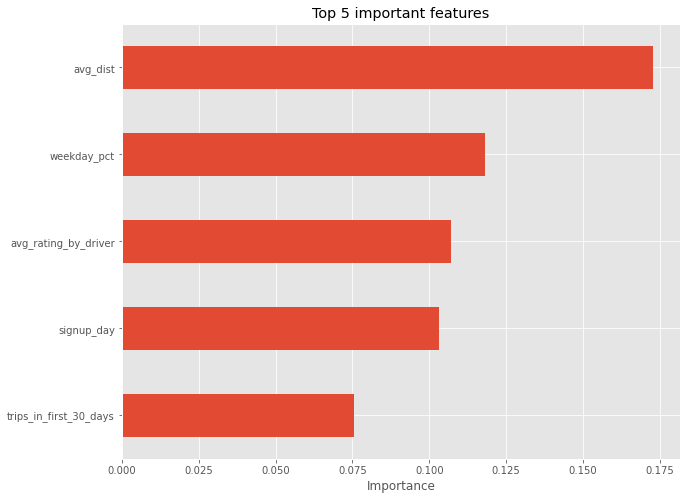

In [105]:
#plot feature importances for random forest

feat_importances = pd.Series(rf1.feature_importances_, index=X_nolastride.columns)
feat_importances.nlargest(5).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))
plt.title("Top 5 important features")
plt.xlabel("Importance")
plt.show()

In [106]:
#dataframe of feature importances
df_feat_importances = pd.DataFrame(rf1.feature_importances_, index = X_nolastride.columns, 
                                             columns=['importance']).sort_values('importance', 
                                                                                 ascending=False)
df_feat_importances.head(10)

,importance
avg_dist,0.172929
weekday_pct,0.118207
avg_rating_by_driver,0.107098
signup_day,0.103286
trips_in_first_30_days,0.075556
avg_rating_of_driver,0.075324
surge_pct,0.071458
signup_dayofweek,0.065111
city_King's Landing,0.061296
avg_surge,0.060613


Here it shows that average distance was a more important factor in determining customer retention for the Random Forest model, in contrast with average rating by driver for the Decision Tree. In terms of scoring, however, the average rating by driver feature was much more impactful to the Decision Tree than average distance was to the Random Forest.

In [107]:
#try knn 

#functions to tune knn

def performance_metric_accuracy(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model(X, y):
 
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    #  Create a logistic regression object
    regressor = KNeighborsClassifier()

    #  Create a dictionary for the parameters 
    params = {'n_neighbors': [3, 5, 7, 10, 12, 15]}
    
    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric_accuracy)

    #  Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [108]:
#find hyperparameters for knn

knnresult = fit_model(X_train_nlr, y_train_nlr)
print(knnresult)

KNeighborsClassifier(n_neighbors=15)


In [110]:
#predict with knn

#instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=15)

# Fit the model on the training data.
knn.fit(X_train_nlr, y_train_nlr)

y_pred = knn.predict(X_test_nlr)

# accuracy score for training
train_accuracy = knn.score(X_train_nlr, y_train_nlr)

# accuracy score for test set
test_accuracy = knn.score(X_test_nlr, y_test_nlr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_nlr, y_pred_nlr)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Training set score is {}".format(train_accuracy))
print("Test set score is {}".format(test_accuracy))
print('ROC AUC is {}'.format(roc_auc))
print(confusion_matrix(y_test_nlr, y_pred))
print(classification_report(y_test_nlr, y_pred))

Training set score is 0.760025
Test set score is 0.7361
ROC AUC is 0.7409432148898321
[[5314  937]
 [1702 2047]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      6251
           1       0.69      0.55      0.61      3749

    accuracy                           0.74     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.73      0.74      0.73     10000



Feature: 0, Score: 0.01583
Feature: 1, Score: -0.00034
Feature: 2, Score: 0.00009
Feature: 3, Score: 0.07346
Feature: 4, Score: 0.13589
Feature: 5, Score: 0.01313
Feature: 6, Score: -0.00001
Feature: 7, Score: 0.00376
Feature: 8, Score: 0.00025
Feature: 9, Score: 0.00108
Feature: 10, Score: 0.00143
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01930
Feature: 14, Score: 0.00213


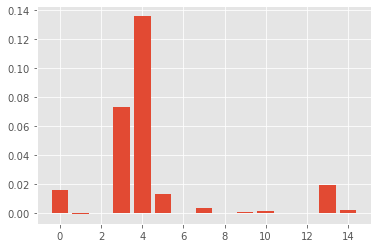

In [111]:
#feature importances cannot be easily obtained for knn. Instead we can use permutation importance
#permutation importances tests model performance over several iterations. During each iteration, data in a column is
#permuted (randomly resorted, basically changed to noise), and the performance in compared to the intact model.
#In short, it test which features contributed to model performance the most

# perform permutation importance
perm_importance = permutation_importance(knn, X_train_nlr, y_train_nlr, scoring='accuracy')
# get importance
importance = perm_importance.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#features 3 and 4 are surge pct and weekday pct

The KNN model performs slightly worse in general compared to Decision Tree and Random Forest. The important features in this model are different yet again. In the graph, features 3 and 4 are the highest, and these correspond to surge percent and weekday percent, respectively.

## Insights:

If we go with the overall best performing model, Random Forest, we note that the top most important features that are indicative of retention are the average distance traveled and the percent of weekday rides.

Looking at the average distances traveled by trained and unretained customers, we see that retained customers generally travel slightly shorter distances.

Likewise examining weekly rides, we see that retained customers traveled on weekdays slightly more frequently, though looking at the boxplots above it's clear they had a smaller range overall.

One way to maximize retention based on this would be to either incentivize longer trips to help keep some of the customers who use the app occasionally for a long trips, but not for more regular shorter trips. This might encourage them to take more trips in general. On the other hand, shorter trips could be incentivized, to encourage the long distance riders in the unretained category to become short distance riders who use the service more frequently.

In [113]:
df.groupby('retained')['avg_dist'].mean()

retained
0    6.207939
1    5.114788
Name: avg_dist, dtype: float64

In [114]:
df.groupby('retained')['weekday_pct'].mean()

retained
0    60.647032
1    61.389034
Name: weekday_pct, dtype: float64

In [115]:
df.groupby('retained')['avg_rating_by_driver'].mean()

retained
0    4.787530
1    4.762843
Name: avg_rating_by_driver, dtype: float64